### CLUSTERING TECHNIQUES

#### Problem Statement : Use clustering techniques for any customer dataset using machine learning

#### Clustering : 
#####  Clustering algorithm is an unsupervised machine learning algorithm that discovers groups of data points that are closely related. 


#### The dataset contains the following attributes:

#### Customer ID
#### Gender	
#### Age	
#### Annual Income ($)	
#### Expenses Score (1-100)	
#### Profession	
#### Work Experience	
#### Family Size


### Importing required libraries

In [50]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

### Loading the datatset

In [51]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\Customers.csv")

In [52]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Expenses Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [53]:
#display column names of dataframe
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Expenses Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [54]:
#finding shape of the dataset(number of rows and columns)
df.shape

(2000, 8)

In [55]:
#statistical info
df.describe()

,CustomerID,Age,Annual Income ($),Expenses Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [56]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Expenses Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [57]:
#To check for null values:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Expenses Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

## Following are some insights  about the dataset:

#### 1. **Missing Values:**
#### 35 values from Profession is found to be null

#### 2. **Numerical Features:**
####   - There are six numerical features: CustomerID, Age, Annual Income ($), Expenses Score (1-100), Work Experience, and Family Size.
####   - The "Spending Score (1-100)" appears to be on a scale from 1 to 100.

#### 3. **Categorical Features:**
####   - There are two categorical features: Gender and Profession.

#### 4. **Data Size:**
####   - The dataset comprises 2000 entries (rows) and 8 columns.

In [58]:
#Filling null values:
df.fillna('Unknown',inplace=True)

In [59]:
#To check for null values:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Expenses Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [60]:
df['Gender'].value_counts()

Female    1186
Male       814
Name: Gender, dtype: int64

In [61]:
df['Profession'].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Unknown           35
Name: Profession, dtype: int64

### Exploratory Data Analysis

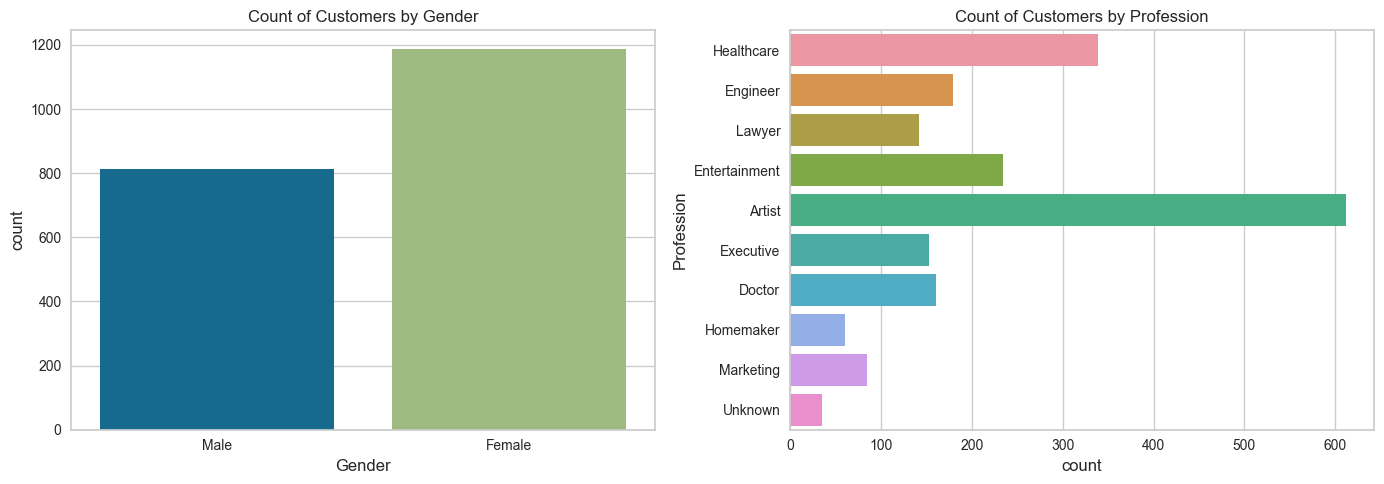

In [62]:
# Visualizing categorical features
plt.figure(figsize=(14, 5))


# Countplot for Gender
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df)
plt.title('Count of Customers by Gender')

# Countplot for Profession
plt.subplot(1, 2, 2)
sns.countplot(y='Profession', data=df)
plt.title('Count of Customers by Profession')
plt.tight_layout()
plt.show()


 #### GENDER : The majority of customers in the dataset are female. This gender predominance indicates an opportunity for targeted marketing strategies tailored to the preferences and needs of the female demographic.

#### PROFESSION : The two most prevalent professions among customers are artists and those in the healthcare sector.

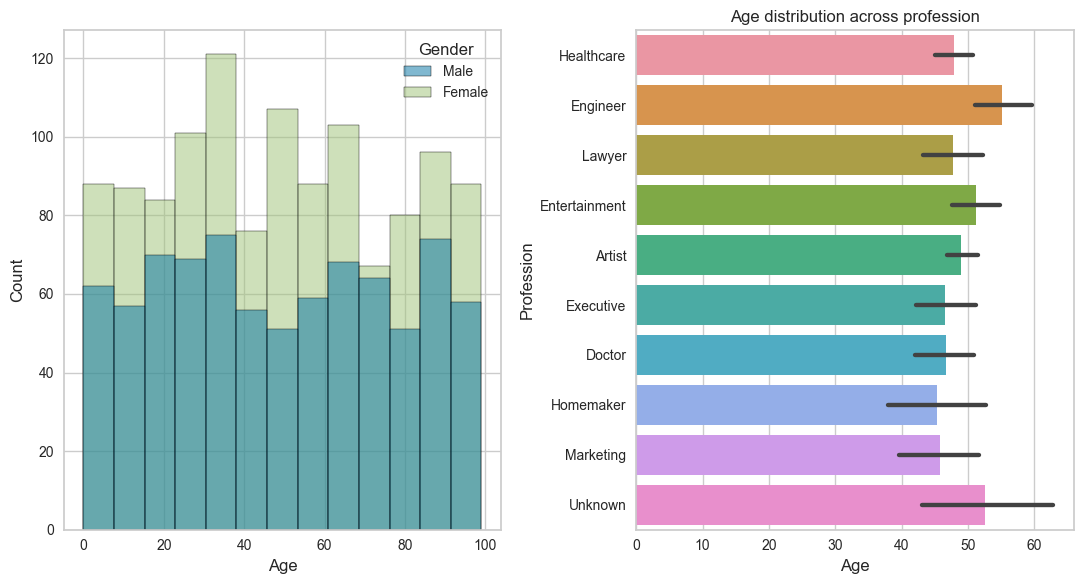

In [63]:
#Customers according to age:
plt.figure(figsize=(11, 6))

plt.subplot(1,2,1)
sns.histplot(x="Age",data=df,hue='Gender')

#Customers according to age with respect to Profession
plt.subplot(1,2,2)
sns.barplot( x='Age', y='Profession',data=df)
plt.title('Age distribution across profession')

plt.tight_layout()
plt.show()


<Axes: xlabel='Profession', ylabel='count'>

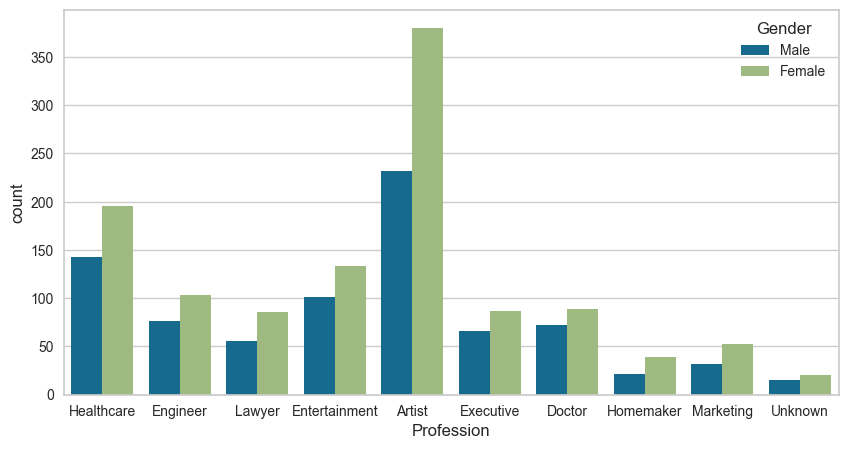

In [64]:
# Number of Male and Female Professions based on the field:
plt.figure(figsize=(10,5))
sns.countplot(data = df,x="Profession",hue="Gender")

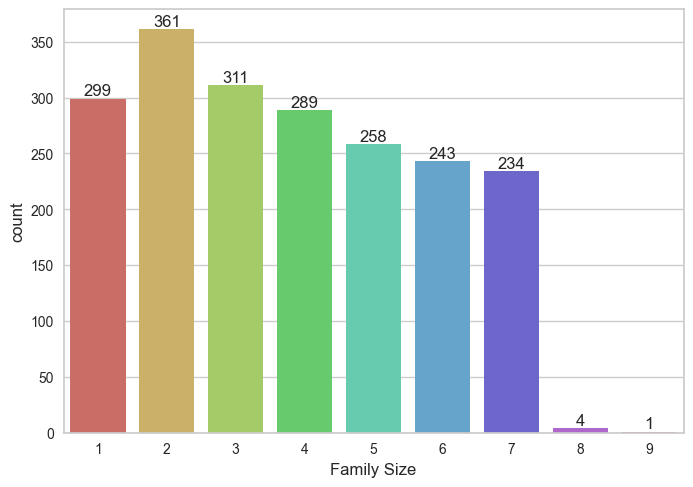

In [65]:
#Customers according to family size
ax=sns.countplot(x='Family Size', data=df, palette="hls")
ax.bar_label(ax.containers[0]);

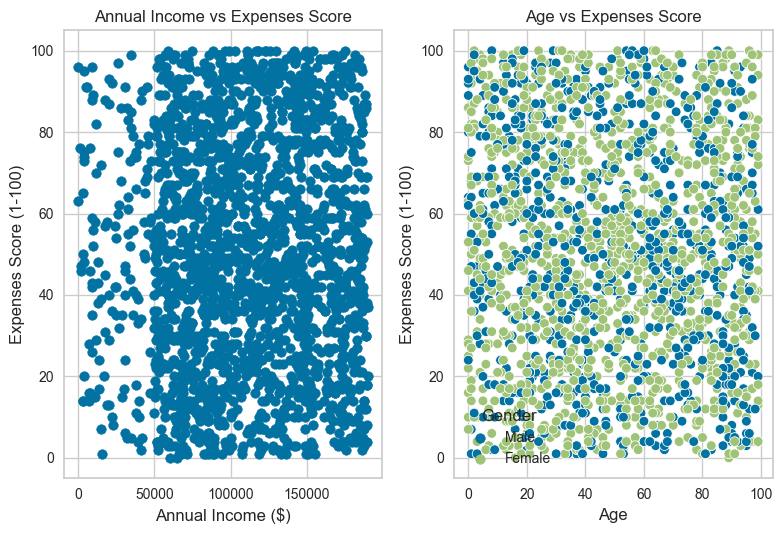

In [66]:
plt.subplot(1,2,1)
plt.scatter(df['Annual Income ($)'], df['Expenses Score (1-100)'])
plt.xlabel('Annual Income ($)')
plt.ylabel('Expenses Score (1-100)')
plt.title('Annual Income vs Expenses Score')
plt.show

plt.subplot(1,2,2)
sns.scatterplot(x='Age', y='Expenses Score (1-100)',data=df, hue='Gender')
plt.xlabel('Age')
plt.ylabel('Expenses Score (1-100)')
plt.title('Age vs Expenses Score')
plt.tight_layout()
plt.show()

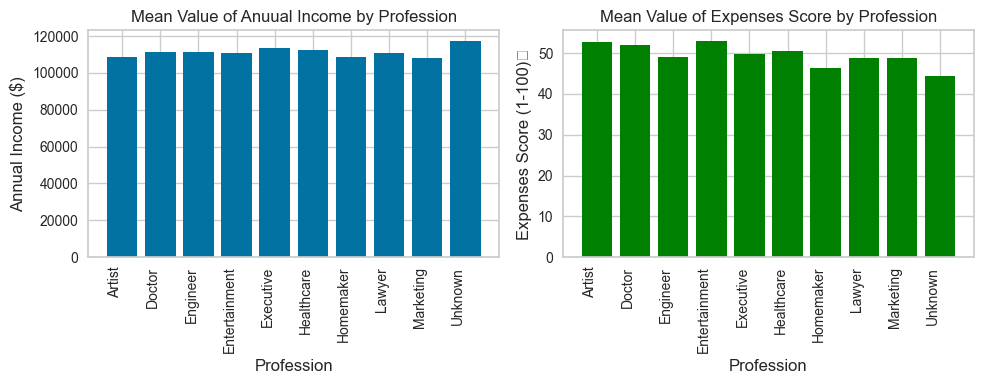

In [67]:
#Average Anuual income and expenses score by Profession 
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
grp_prof = df.groupby('Profession')['Annual Income ($)'].mean().reset_index()
plt.bar(grp_prof['Profession'],grp_prof['Annual Income ($)'])
plt.xlabel('Profession')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90, ha='right')

plt.ylabel('Annual Income ($)')
plt.title('Mean Value of Anuual Income by Profession')

plt.subplot(1,2,2)
grp_prof_1 = df.groupby('Profession')['Expenses Score (1-100)'].mean().reset_index()
plt.bar(grp_prof_1['Profession'],grp_prof_1['Expenses Score (1-100)'],color='green')
plt.xlabel('Profession')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90, ha='right')

plt.ylabel('Expenses Score (1-100)	')
plt.title('Mean Value of Expenses Score by Profession')

plt.tight_layout()
plt.show()

#### Customers who were in Entertainment field had the highest average expenses score.
#### Customers who were in Executiveand unknown field had the highest average annual incomes.

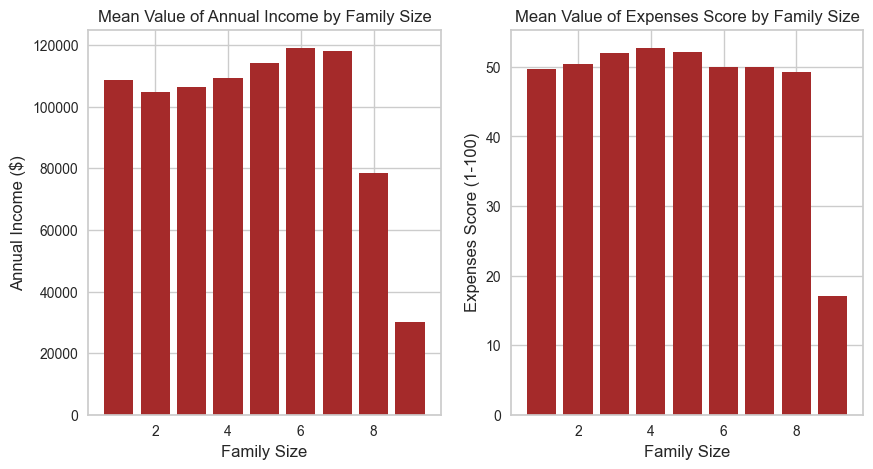

In [68]:
#Average Anuual income and expenses score by Family Size
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
grp_fam= df.groupby('Family Size')['Annual Income ($)'].mean().reset_index()
plt.bar(grp_fam['Family Size'],grp_fam['Annual Income ($)'],color='brown')
plt.xlabel('Family Size')
plt.ylabel('Annual Income ($)')
plt.title('Mean Value of Annual Income by Family Size')


plt.subplot(1,2,2)
grp_fam_1= df.groupby('Family Size')['Expenses Score (1-100)'].mean().reset_index()
plt.bar(grp_fam_1['Family Size'],grp_fam_1['Expenses Score (1-100)'],color='brown')
plt.xlabel('Family Size')
plt.ylabel('Expenses Score (1-100)')
plt.title('Mean Value of Expenses Score by Family Size')

plt.show()

<Axes: >

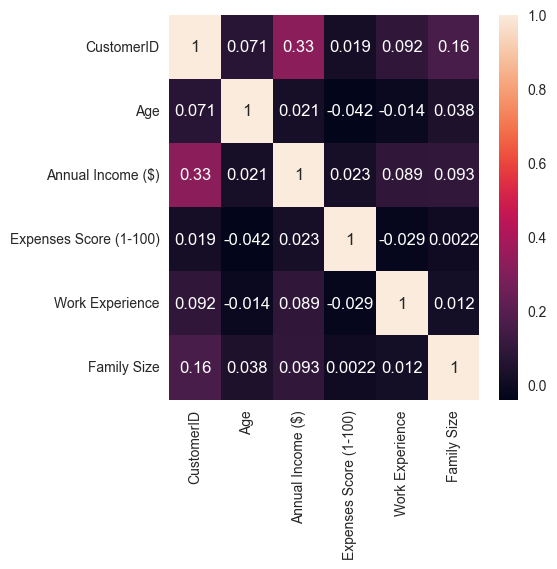

In [69]:
#Correlation for all variables in the dataframe:
plt.figure(figsize=[5,5])
sns.heatmap(df.corr(),annot=True)

In [70]:
df.drop(columns='CustomerID',inplace=True)

In [71]:
df.head()

,Gender,Age,Annual Income ($),Expenses Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


### Label Encoding

#### Label encoding is a technique used in machine learning and data analysis to convert categorical variables into numerical format. It is particularly useful when working with algorithms that require numerical input, as most machine learning models can only operate on numerical data.

In [72]:
# Instantiate the LabelEncoder
label = LabelEncoder()

# Apply the LabelEncoder to each column
df['Profession'] = label.fit_transform(df['Profession'])
df['Gender'] = label.fit_transform(df['Gender'])

In [73]:
df.head()

,Gender,Age,Annual Income ($),Expenses Score (1-100),Profession,Work Experience,Family Size
0,1,19,15000,39,5,1,4
1,1,21,35000,81,2,3,3
2,0,20,86000,6,2,1,1
3,0,23,59000,77,7,0,2
4,0,31,38000,40,3,2,6


In [74]:
#Standardize the data:
df_sc = StandardScaler().fit_transform(df[['Expenses Score (1-100)','Annual Income ($)']])


### Building the clustering model

#### Lets build the model with df_sc and decide the number of clusters to be used.

#### i) The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but k-means is one of the oldest and most approachable. 

#### ii) Yellowbrick is a Python library that extends the functionality of scikit-learn to provide visualizations for machine learning tasks. It can be
#### particularly useful for visualizing the results of clustering algorithms, such as k-means clustering.

#### KElbow Visualizer: visualize cluster according to the specified scoring function, looking for the "elbow" in the curve.

Text(0, 0.5, 'WSS')

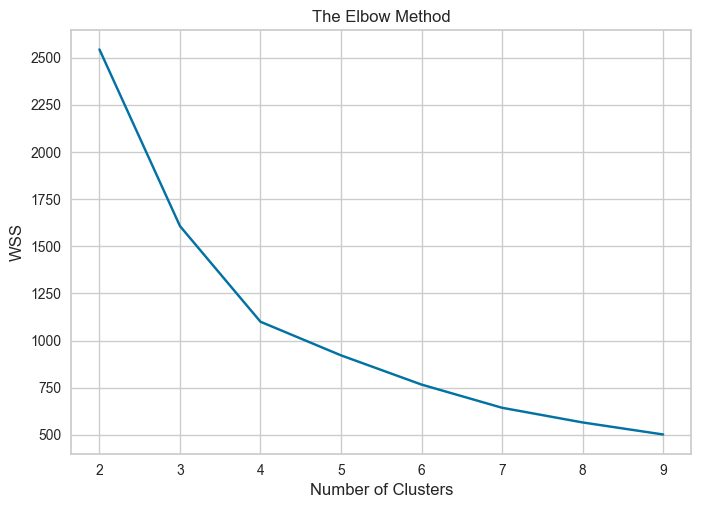

In [86]:
wss=[]

for k in range(2,10):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df_sc)
    wss.append(kmeans.inertia_)

plt.plot(range(2, 10), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')

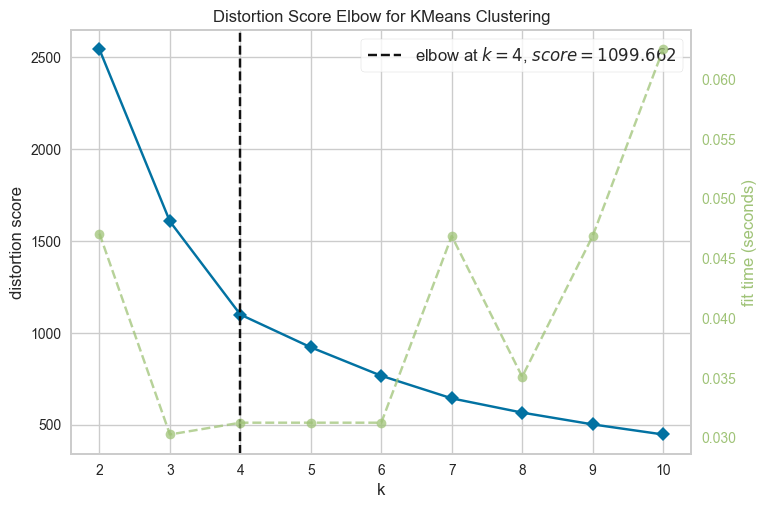

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
model = KMeans()
visualizer = KElbowVisualizer(model)
visualizer.fit(df_sc)
visualizer.show()

#### The k parameter in KElbowVisualizer specifies the range of cluster numbers to evaluate. From the above graph, we observe that the number of clusters is four.

### Model Training

In [76]:
# Fit K-Means clustering model with optimal number of clusters
kmeans=KMeans(n_clusters=4,random_state=42)
df['Cluster Label']=kmeans.fit_predict(df_sc)

In [77]:
df.head()

,Gender,Age,Annual Income ($),Expenses Score (1-100),Profession,Work Experience,Family Size,Cluster Label
0,1,19,15000,39,5,1,4,1
1,1,21,35000,81,2,3,3,2
2,0,20,86000,6,2,1,1,1
3,0,23,59000,77,7,0,2,2
4,0,31,38000,40,3,2,6,1


### Cluster Visualization

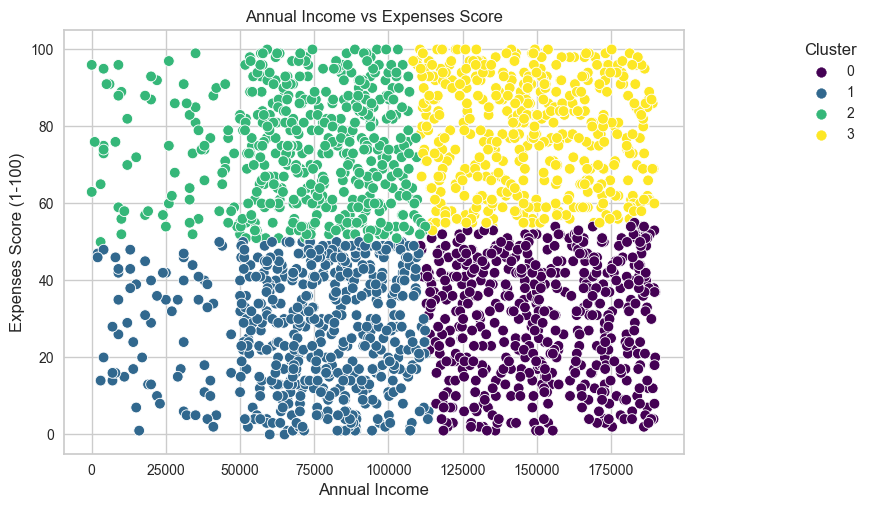

In [88]:
sns.scatterplot(x='Annual Income ($)', y='Expenses Score (1-100)', hue='Cluster Label', data=df, palette='viridis', s=60)
plt.title('Annual Income vs Expenses Score')
plt.xlabel('Annual Income')
plt.ylabel('Expenses Score (1-100)')
plt.legend(title='Cluster',loc="upper right",bbox_to_anchor=(1.3,1))

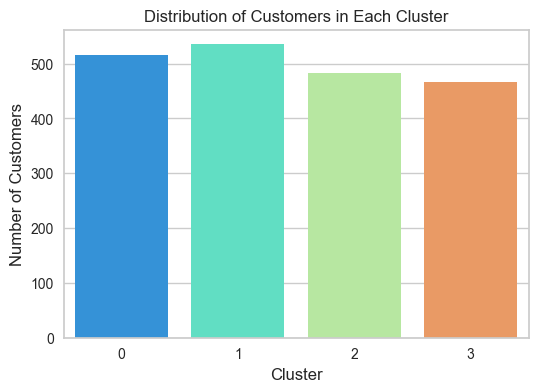

In [79]:
plt.figure(figsize=(6,4))
sns.countplot(x='Cluster Label', data=df, palette='rainbow')
plt.title('Distribution of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

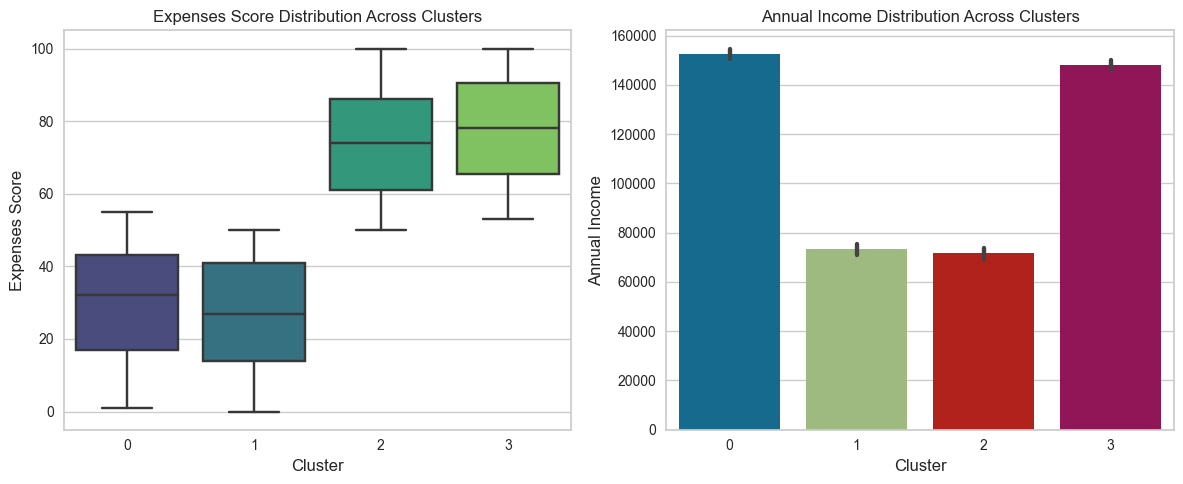

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='Cluster Label', y='Expenses Score (1-100)', data=df, palette='viridis')
plt.title('Expenses Score Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Expenses Score')

plt.subplot(1,2,2)
sns.barplot(x='Cluster Label', y='Annual Income ($)', data=df)
plt.title('Annual Income Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Annual Income')

plt.tight_layout()
plt.show
